# Law of Large numbers and central limit theoram

## Law of Large numbers
### IID samples:
The random variables that are drawn from from the same distribution with mean \mu and standard deviation sigma and if these draws are independent we call this sample set identical and  independently distributed

### definition of sample mean:
for i.i.d random variables $ X_1, X_2, X_3,...,X_n$, then the 
sample mean is denoted by $ \overline{X}$, is denoted as
$$
 \overline{X} = \frac{X_1+X_2+X_3+...+X_n}{n}
$$
Note that mean is a random variable

The expectation value of the mean:

\begin{aligned}
E[\overline{X}] &= \frac{E[X_1]+E[X_2]+E[X_3]+...+E[X_n]}{n} &\\
                &= \frac{nE[X]}{n} &\\
                &= E[X] &\\
\end{aligned}

The varience of \overline{X} :
\begin{aligned}
Var[\overline{X}] &= \frac{Var[X_1]+Var[X_2]+Var[X_3]+...+Var[X_n]}{n} &\\
                &= \frac{nVar[X]}{n^2} &\\
                &= \frac{Var[X]}{n} &\\
\end{aligned}

The weak law of large numbers(WLLN):
Let $ X_1,x_2,...,X_n be i.i.d random variables with a finite value $E[X_i] = \mu < \infty.$ Then, for any $\epsilon > 0$,
$$
\lim_{n\to\infty}P(|{\overline{X}-\mu}| \geq \epsilon) = 0
$$



In [36]:
# import ilbraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
#creting random number generator
random_key  = 100
rng = np.random.default_rng(random_key)

In [38]:
class Uniform_pdf:
    def __init__(self,n=100,a=0,b=1):
        self.n = n # no_of_samples to generate
        self.a = a # lowest value of x
        self.b = b # highest value of x
    def samples(self):
        x = rng.uniform(self.a,self.b,self.n)
        return x
    def dis_mean(self):
        return (self.a + self.b) / 2
    def dis_std(self):
        std = np.sqrt((self.b-self.a)/12)
        return std

- Generating i.i.d random variables $ X_1, X_2, X_3,...,X_n$ from uniform distribution
    

In [39]:
# generating sample mean
def mean_data(n_start,n_end, n_step,a,b):
    shape = (n_end-n_start) // (n_step)
    sample_mean = np.zeros(shape=(shape,2))
    for i,n in enumerate(range(n_start,n_end, n_step)):
        pdf = Uniform_pdf(n,a,b)
        iid_data = pdf.samples()
        sample_mean[i] = (n,iid_data.mean())
    distribution_mean = pdf.dis_mean()
    distribution_std = pdf.dis_std()
    return sample_mean,distribution_mean,distribution_std


(999, 2)


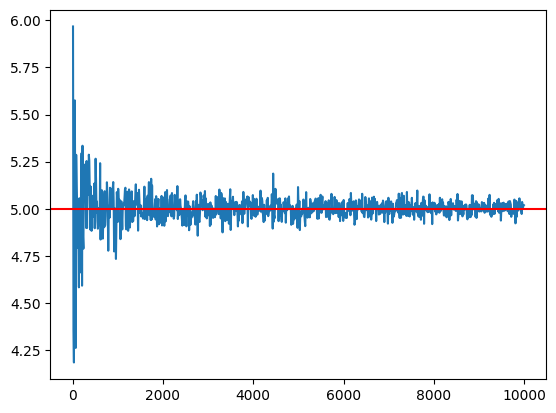

In [44]:
n_start = 10
n_end = 10000
n_step = 10
a = 0
b = 10
sample_mean,distribution_mean,distribution_std = mean_data(n_start,n_end, n_step,a,b)
print(sample_mean.shape)
plt.plot(sample_mean[:,0],sample_mean[:,1])
plt.axhline(y=distribution_mean, color = 'r',linestyle='-')

## Central limit Theorem

Let $ X_1,X_2,...,X_n $ be i.i.d random variables with expecttion value $ E[X_i] = \mu < \infty $ and varience 
$ 0 < Var(X_i) = \sigma ^ 2  < \infty$. Then the random variable
\begin{equation}
Z_n = \frac{\overline{X}-\mu}{\sigma / \sqrt{n}} = \frac{X_1+X_2+...+X_n-n\mu}{\sqrt{n}\sigma}
\end{equation}
converges in distribution to the standard normal random variable as $n$
 goes to infinity, that is
 
\begin{equation}
\lim_{n\to\infty}P(Z_n \leq x ) = \Phi(x) for all x \to \mathbb{R}
\end{equation}

where $\Phi(x)$ is the standard normal CDF


In [41]:
z = ( sample_mean[:,1] - distribution_mean ) / (distribution_std / (np.sqrt(sample_mean[:,1])))

In [42]:
print(z)

[ 2.42978635  4.82692973 -0.08248277 ... -0.01796473 -0.16490872
  0.00768601]


<AxesSubplot: ylabel='Count'>

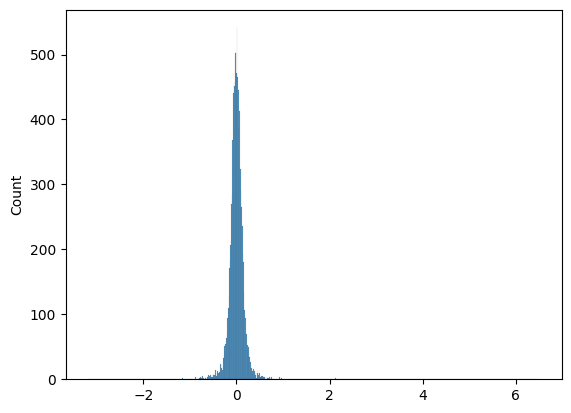

In [43]:
sns.histplot(z)